In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
header = ("NUM_N", "N", "NUM_BLOCKS", "BLOCK_SIZE", "PROC_MAP", "NUM_PxQ", "P", "Q", "THRESH", "NUM_PFACT", "PFACT", "NUM_REC_STOP_CRIT", "NBMIN", "NUM_REC_PANELS", "NDIV", "NUM_RPFACT", "RPFACT", "NUM_BCAST", "BCAST", "NUM_DEPTH", "DEPTH", "SWAP", "SWAP_THRESH", "L1_T", "U_T", "EQUIL", "MEM_ALIGN", "SLURM_NNODES", "SLURM_NTASKS_PER_NODE", "SLURM_CPUS_PER_TASK", "GFLOPS")

In [3]:
dat_hopper = pd.read_csv('hopper/gcc-11/param_sweep/HPL_global_results.csv', names=header)
dat_hopper['Cluster'] = 'Hopper'

In [4]:
dat_wheeler = pd.read_csv('wheeler/gcc-11/param_sweep/HPL_global_results.csv', names=header)
dat_wheeler['Cluster'] = 'Wheeler'

In [5]:
data = pd.concat((dat_hopper, dat_wheeler))
data

,NUM_N,N,NUM_BLOCKS,BLOCK_SIZE,PROC_MAP,NUM_PxQ,P,Q,THRESH,NUM_PFACT,...,SWAP_THRESH,L1_T,U_T,EQUIL,MEM_ALIGN,SLURM_NNODES,SLURM_NTASKS_PER_NODE,SLURM_CPUS_PER_TASK,GFLOPS,Cluster
0,1,3000,1,128,0,1,1,8,16.0,1,...,64,0,0,1,8,1,8,4,183.24,Hopper
1,1,3000,1,128,0,1,4,2,16.0,1,...,64,0,0,1,8,1,8,4,158.72,Hopper
2,1,3000,1,232,0,1,1,8,16.0,1,...,64,0,0,1,8,1,8,4,147.63,Hopper
3,1,3000,1,128,0,1,2,4,16.0,1,...,64,0,0,1,8,1,8,4,179.89,Hopper
4,1,3000,1,232,0,1,2,4,16.0,1,...,64,0,0,1,8,1,8,4,159.29,Hopper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498,1,73080,1,232,0,1,4,12,16.0,1,...,64,0,0,1,8,48,1,8,479.91,Wheeler
1499,1,73080,1,232,0,1,8,6,16.0,1,...,64,0,0,1,8,48,1,8,494.66,Wheeler
1500,1,73080,1,512,0,1,2,24,16.0,1,...,64,0,0,1,8,48,1,8,442.42,Wheeler
1501,1,73080,1,512,0,1,4,12,16.0,1,...,64,0,0,1,8,48,1,8,427.48,Wheeler


In [6]:
data['Process Count'] = data['SLURM_NNODES'] * data['SLURM_NTASKS_PER_NODE'] * data['SLURM_CPUS_PER_TASK']

In [7]:
data["Q/P"] = data["Q"] / data["P"]

# Plots

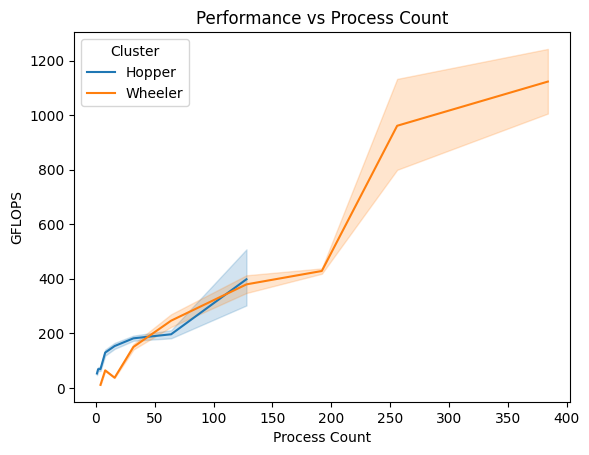

In [8]:
sns.lineplot(data, x="Process Count", y="GFLOPS", hue='Cluster')
plt.title('Performance vs Process Count')
plt.savefig('figures/flops_process_count.svg')

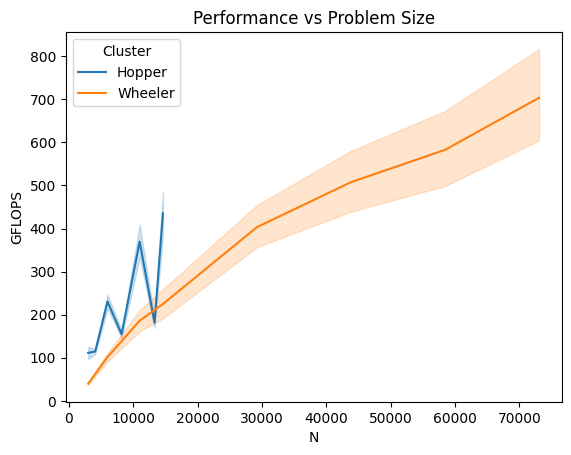

In [9]:
sns.lineplot(data, x="N", y="GFLOPS", hue='Cluster')
plt.title('Performance vs Problem Size')
plt.savefig('figures/flops_problem_size.svg')

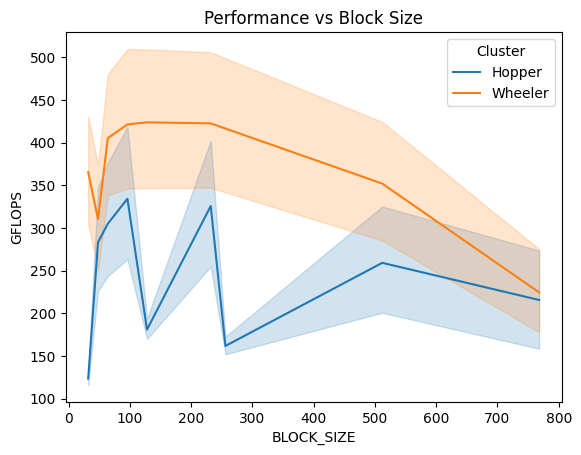

In [10]:
sns.lineplot(data, x="BLOCK_SIZE", y="GFLOPS", hue='Cluster')
plt.title('Performance vs Block Size')
plt.savefig('figures/flops_block_size.svg')

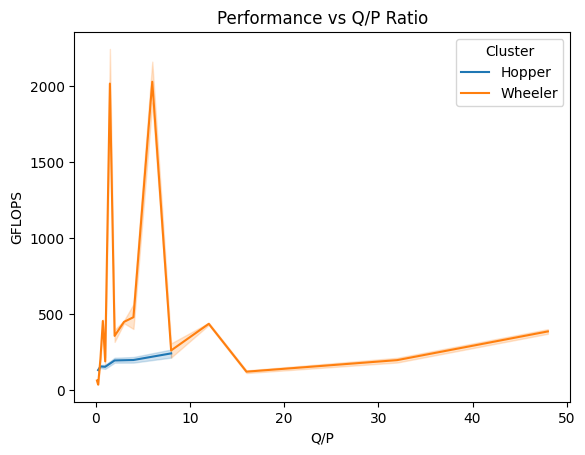

In [11]:
sns.lineplot(data, x="Q/P", y="GFLOPS", hue='Cluster')
plt.title('Performance vs Q/P Ratio')
plt.savefig('figures/flops_q_p.svg')

# Statistics

In [19]:
# Summary Stats for performance of ALL runs
stats_all_runs = data["GFLOPS"].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
stats_all_runs

count    2784.000000
mean      278.055839
std       393.255700
min         9.360800
25%        76.586750
50%       160.260000
75%       310.285000
90%       505.332000
95%       964.359000
99%      2261.299000
max      2996.200000
Name: GFLOPS, dtype: float64

In [20]:
# Summary stats for Hopper
stats_hopper = data[data['Cluster'] == 'Hopper']["GFLOPS"].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
stats_hopper

count    1281.000000
mean      170.073240
std       120.966211
min        30.787000
25%        83.445000
50%       132.930000
75%       208.660000
90%       333.200000
95%       376.640000
99%       593.910000
max       883.640000
Name: GFLOPS, dtype: float64

In [21]:
# Summary stats for Wheeler
stats_wheeler = data[data['Cluster'] == 'Wheeler']["GFLOPS"].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
stats_wheeler

count    1503.000000
mean      370.088912
std       505.623340
min         9.360800
25%        71.046000
50%       217.350000
75%       439.775000
90%       909.560000
95%      1610.860000
99%      2582.084000
max      2996.200000
Name: GFLOPS, dtype: float64

In [30]:
# latex
print(pd.concat([stats_all_runs, stats_hopper, stats_wheeler], axis=1).round(0).astype(int).to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  GFLOPS &  GFLOPS &  GFLOPS \\
\midrule
count &    2784 &    1281 &    1503 \\
mean  &     278 &     170 &     370 \\
std   &     393 &     121 &     506 \\
min   &       9 &      31 &       9 \\
25\%   &      77 &      83 &      71 \\
50\%   &     160 &     133 &     217 \\
75\%   &     310 &     209 &     440 \\
90\%   &     505 &     333 &     910 \\
95\%   &     964 &     377 &    1611 \\
99\%   &    2261 &     594 &    2582 \\
max   &    2996 &     884 &    2996 \\
\bottomrule
\end{tabular}

